In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import math
from IPython.display import HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import csv


# Create empty dataframe

#define data dimensions

n = 100

In [2]:
def generate_data(n):
    patient_age = []
    exercise_minutes = []
   
    for x in range(n):
        age = random.randint(18, 99)
        patient_age.append(age)


        if age > 50:
            exercise_minutes.append(random.randint(15, 80))
        else:
            exercise_minutes.append(random.randint(50, 180))
            

    return patient_age, exercise_minutes




patient_age, exercise_minutes = generate_data(n)

In [3]:
def generate_data(n):
    medication = []
    diabetes_type = []
    
    for _ in range(n):
        d_type = random.randint(1, 2)
        diabetes_type.append(d_type)
        
        if d_type > 1:
            medication.append(random.randint(5, 8))
        else:
            medication.append(random.randint(1, 4))
            
    return diabetes_type, medication

diabetes_type, medication = generate_data(n)

In [4]:
traindata = pd.DataFrame()


traindata['Patient ID'] = np.arange(1, n+1)
traindata['Patient Age'] = patient_age
traindata['Exercise Mins'] = exercise_minutes
traindata['Diabetes Type'] = diabetes_type
traindata['Medications'] = medication
traindata['Sex'] = np.random.choice([1, 2], n)
traindata['# of Appointments per Year'] = np.random.randint(2, 7, n)


traindata

,Patient ID,Patient Age,Exercise Mins,Diabetes Type,Medications,Sex,# of Appointments per Year
0,1,51,18,1,3,2,2
1,2,97,23,2,5,2,2
2,3,51,68,2,6,1,4
3,4,60,72,1,3,1,6
4,5,57,67,2,5,1,2
...,...,...,...,...,...,...,...
95,96,40,107,2,5,2,3
96,97,54,68,1,4,2,5
97,98,22,173,2,7,2,5
98,99,37,160,2,6,2,3


In [5]:
def create_download_link(traindata, title = "Download CSV file", filename = "spph_train_data.csv"):  
    csv = traindata.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(traindata)

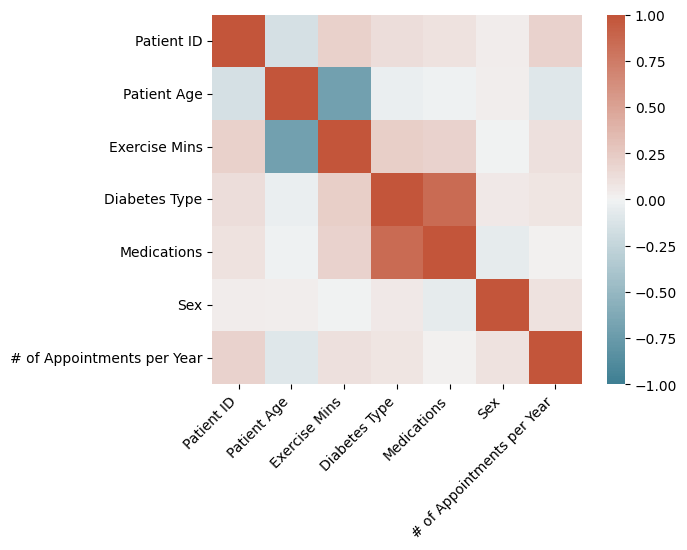

In [6]:
corr = traindata.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

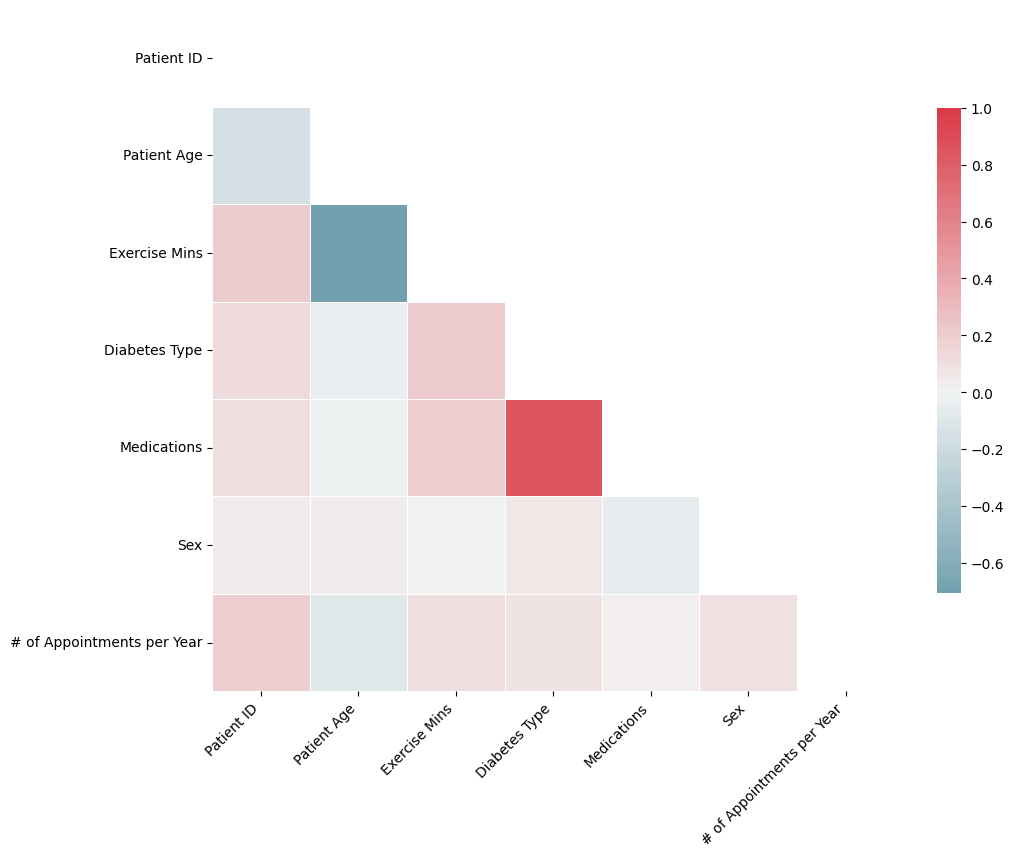

In [7]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype= bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(20, 220, n=400)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [8]:
x = np.array(patient_age).reshape((-1, 1))
y = np.array(exercise_minutes)

model = LinearRegression()

model.fit(x,y)

r_sq = model.score(x, y)

r_sq, model.intercept_, model.coef_

(0.4961566965097267, 158.16153715952663, array([-1.41685429]))

In [9]:
y_pred = model.predict(x)

#predicted minutes of exercise given a certain age

data1 = pd.DataFrame()

data1['Age'] = patient_age
data1['Predicted Mins of Exercise'] = y_pred

data1

,Age,Predicted Mins of Exercise
0,51,85.901968
1,97,20.726671
2,51,85.901968
3,60,73.150280
4,57,77.400843
...,...,...
95,40,101.487366
96,54,81.651406
97,22,126.990743
98,37,105.737928


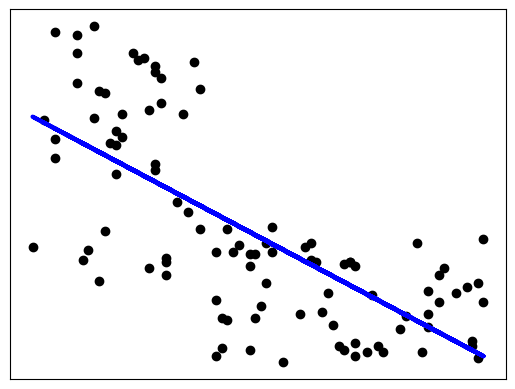

In [10]:
plt.scatter(patient_age, exercise_minutes, color="black")
plt.plot(patient_age, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [11]:
file = open('/kaggle/input/dkfhas/Test Data 2.csv')
type(file)

csvreader = csv.reader(file)

header = []
header = next(csvreader)
header

['Patient ID', 'Patient Age']

In [12]:
rows = []
for row in csvreader:
    rows.append(row)
rows

[['', ''],
 ['1', '18'],
 ['2', '82'],
 ['3', '69'],
 ['4', '86'],
 ['5', '35'],
 ['6', '38'],
 ['7', '46'],
 ['8', '20'],
 ['9', '67'],
 ['10', '90'],
 ['11', '63'],
 ['12', '76'],
 ['13', '90'],
 ['14', '37'],
 ['15', '30'],
 ['16', '25'],
 ['17', '76'],
 ['18', '26'],
 ['19', '56'],
 ['20', '46'],
 ['21', '48'],
 ['22', '99'],
 ['23', '29'],
 ['24', '42'],
 ['25', '71'],
 ['26', '70'],
 ['27', '69'],
 ['28', '65'],
 ['29', '67'],
 ['30', '47'],
 ['31', '69'],
 ['32', '81'],
 ['33', '46'],
 ['34', '91'],
 ['35', '95'],
 ['36', '27'],
 ['37', '76'],
 ['38', '29'],
 ['39', '40'],
 ['40', '86'],
 ['41', '19'],
 ['42', '45'],
 ['43', '44'],
 ['44', '34'],
 ['45', '80'],
 ['46', '37'],
 ['47', '34'],
 ['48', '57'],
 ['49', '98'],
 ['50', '84'],
 ['51', '24'],
 ['52', '72'],
 ['53', '78'],
 ['54', '70'],
 ['55', '31'],
 ['56', '18'],
 ['57', '68'],
 ['58', '64'],
 ['59', '54'],
 ['60', '83'],
 ['61', '67'],
 ['62', '23'],
 ['63', '42'],
 ['64', '69'],
 ['65', '64'],
 ['66', '74'],
 ['67', 